# Linear Regression Project

Linear regression is a statistical modeling tool that we can use to predict one variable using another.
The objective of this project is to make use of linear regression models to predict which feature of the dataset is most influential on Boston home prices.

This dataset is available at UCI ML housing dataset.
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

Usefull info.
http://sfb649.wiwi.hu-berlin.de/fedc_homepage/xplore/tutorials/mvahtmlnode11.html

#### The data contains the following columns
* CRIM
    - per capita crime rate by town
* ZN
    - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS
    - proportion of non-retail business acres per town
* CHAS
    - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX
    - nitric oxides concentration (parts per 10 million)
* RM
    - average number of rooms per dwelling
* AGE
    - proportion of owner-occupied units built prior to 1940
* DIS
    - weighted distances to five Boston employment centres
* RAD
    - index of accessibility to radial highways
* TAX
    - full-value property-tax rate per \$10,000
* PTRATIO
    - pupil-teacher ratio by town
* B
    - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT
    - %lower status of the population
* MEDV
    - Median value of owner-occupied homes in $1000's

## Imports

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

## Get Data

In [36]:
boston = load_boston()
dataframe = pd.DataFrame(boston.data, columns=boston.feature_names)

In [37]:
dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [38]:
dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [40]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


## Exploratory Data Analysis

In [41]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

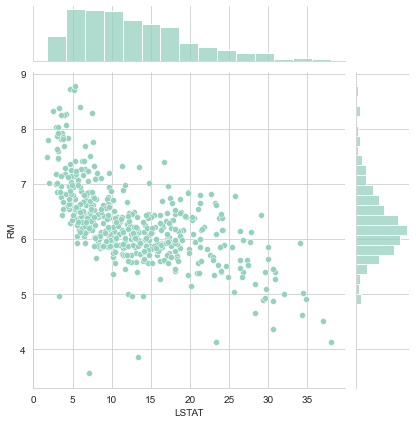

In [50]:
sns.jointplot(x = 'LSTAT', y = 'RM', data = dataframe)

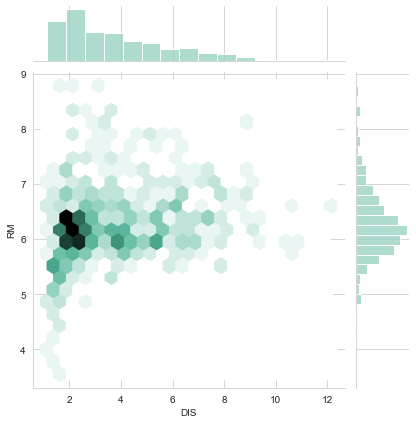

In [52]:
sns.jointplot(x = 'DIS', y = 'RM', data = dataframe, kind='hex')

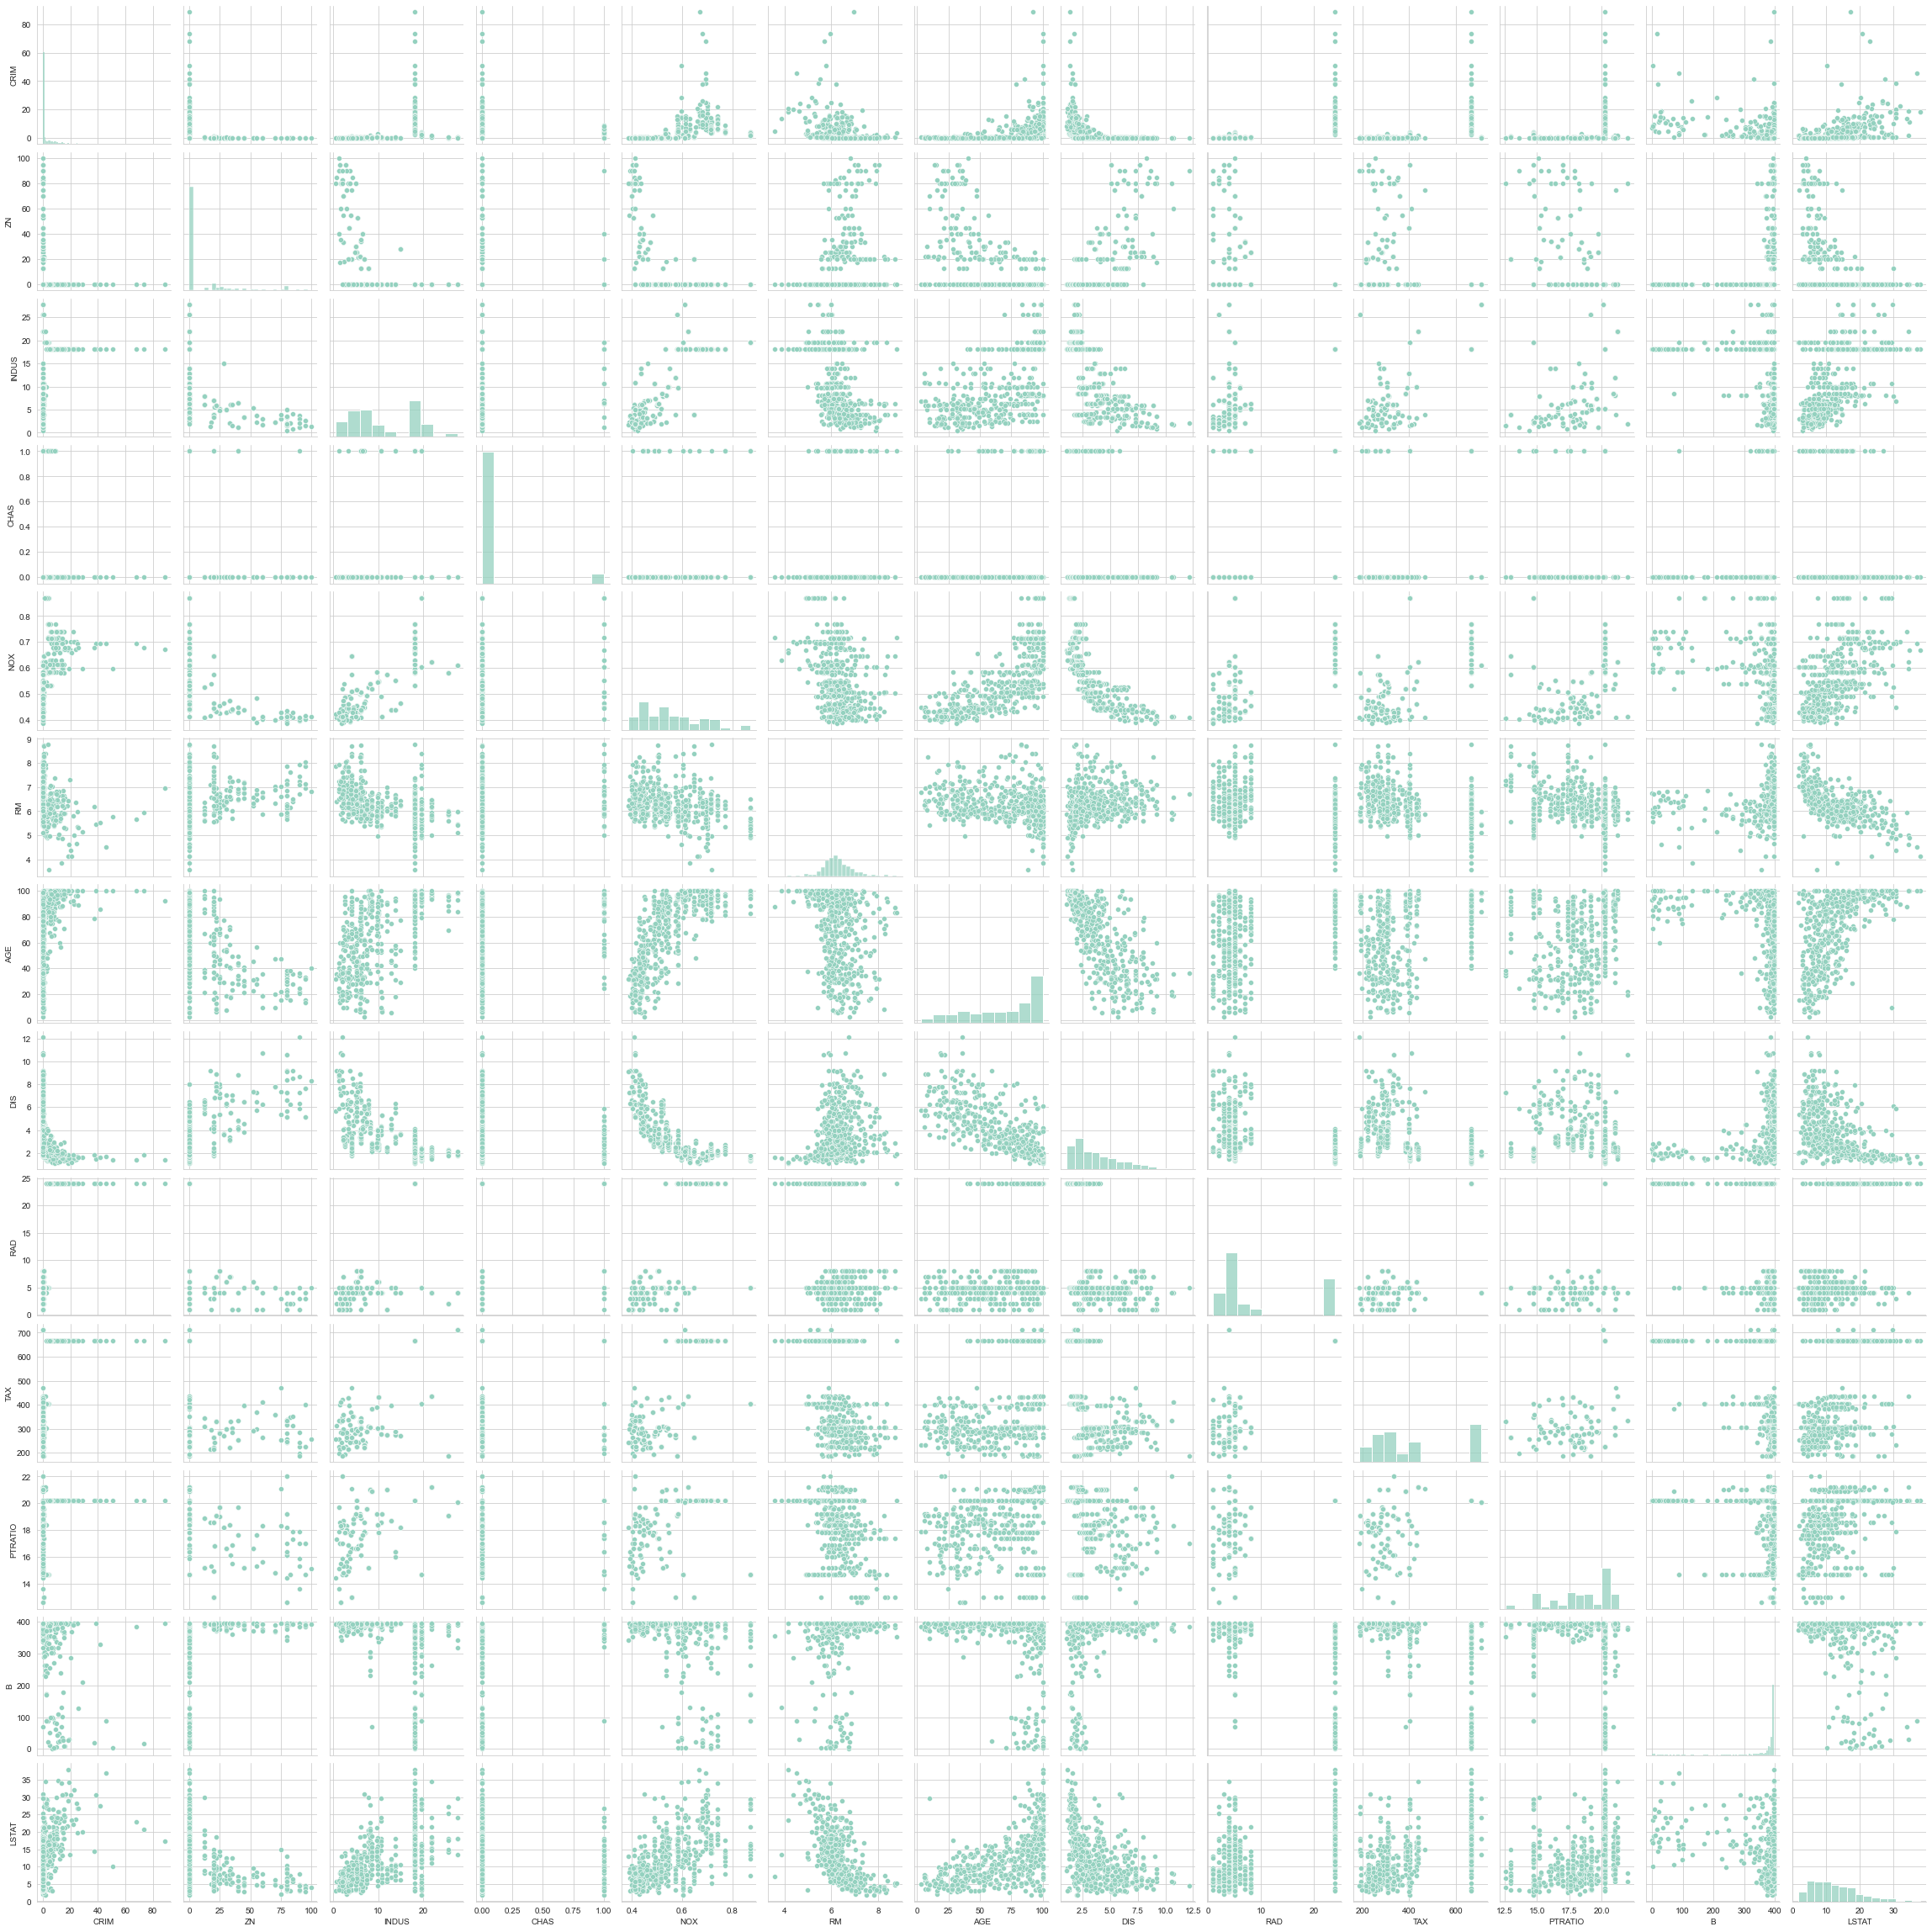

In [48]:
sns.pairplot(dataframe)

<AxesSubplot:>

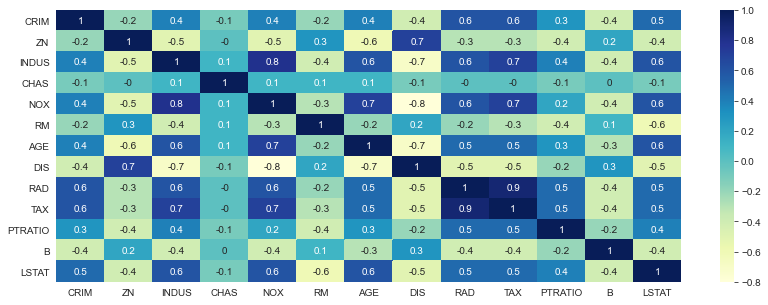

In [106]:
plt.figure(figsize=(14,5))
sns.heatmap(data=dataframe.corr().round(1), cmap="YlGnBu", annot=True)

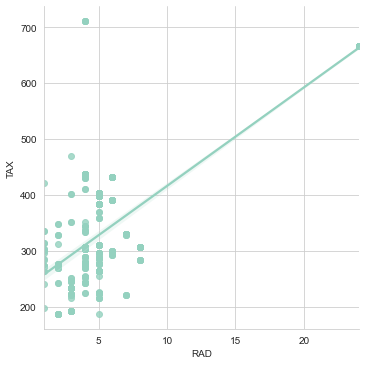

In [110]:
sns.lmplot(x = 'RAD', y = 'TAX', data = dataframe)

## Training and Testing Data

In [65]:
X = dataframe[boston.feature_names]

In [66]:
y = boston.target

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Training the Model

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
lm = LinearRegression()

In [72]:
lm.fit(X_train, y_train)

LinearRegression()

In [73]:
lm.coef_

array([-7.75583711e-02,  4.20310157e-02,  9.11529473e-02,  4.13304932e+00,
       -1.99765575e+01,  2.89019042e+00,  1.61533256e-02, -1.26474745e+00,
        2.60170760e-01, -1.11251993e-02, -8.80555502e-01,  7.02445445e-03,
       -6.43482813e-01])

- Coefficient: Regression coefficients are estimates of the unknown population parameters and describe the relationship between a predictor variable and the response.

In [74]:
lm.intercept_

41.28149654473783

- Intercept: The intercept (often labeled the constant) is the expected mean value of Y when all X=0.

## Predicting Test Data

In [76]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

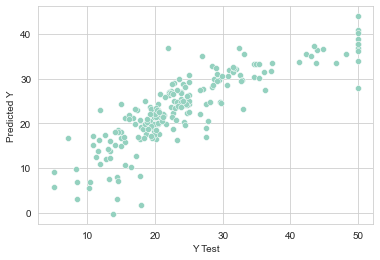

In [78]:
sns.scatterplot(x = y_test, y = predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

In [79]:
from sklearn import metrics

print('MAE', metrics.mean_absolute_error(y_test, predictions))
print('MSE', metrics.mean_squared_error(y_test, predictions))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE 3.9051448026275173
MSE 29.41636546745297
RMSE 5.423685598138315


## Residuals

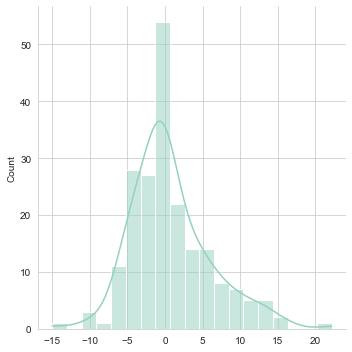

In [80]:
sns.displot(x = (y_test-predictions), kde=True)

## Conclusion

In [111]:
coefficients = pd.DataFrame(lm.coef_,X.columns)
coefficients.columns = ['Coeffecient']
coefficients

,Coeffecient
CRIM,-0.077558
ZN,0.042031
INDUS,0.091153
CHAS,4.133049
NOX,-19.976557
RM,2.890190
AGE,0.016153
DIS,-1.264747
RAD,0.260171
TAX,-0.011125


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in <ins>CRIM</ins> **per capita crime rate by town** is associated with a **decrease of -0.08 median home values in \$1000's**.

- Holding all other features fixed, a 1 unit increase in <ins>ZN</ins> **proportion of residential land zoned for lots over 25,000 sq.ft.** is associated with an **increase of 0.04 median home values in \$1000's**.

- Holding all other features fixed, a 1 unit increase in <ins>INDUS</ins> **proportion of non-retail business acres per town** is associated with an **increase of 0.09 median home values in \$1000's**.

- Holding all other features fixed, a 1 unit increase in <ins>CHAS</ins> **Charles River dummy variable(=1 if tract bounds river; 0 otherwise)** is associated with an **increase of 4.13 median home values in \$1000's**.

- Holding all other features fixed, a 1 unit increase in <ins>NOX</ins> **nitric oxides concentration (parts per 10 million)** is associated with a **decrease of -19.98 median home values in \$1000's**.

- Holding all other features fixed, a 1 unit increase in <ins>RM</ins> **average number of rooms per dwelling** is associated with an **increase of 2.89 median home values in \$1000's**.

- Holding all other features fixed, a 1 unit increase in <ins>AGE</ins> **proportion of owner-occupied units built prior to 1940** is associated with an **increase of 0.02 median home values in \$1000's**.

- Holding all other features fixed, a 1 unit increase in <ins>DIS</ins> **weighted distances to five Boston employment centres** is associated with a **decrease of -1.26 median home values in \$1000's**.

- Holding all other features fixed, a 1 unit increase in <ins>RAD</ins> **index of accessibility to radial highways** is associated with an **increase of 0.26 median home values in \$1000's**.

- Holding all other features fixed, a 1 unit increase in <ins>TAX</ins> **full-value property-tax rate per \$10,000** is associated with a **decrease of -0.01 median home values in \$1000's**.

- Holding all other features fixed, a 1 unit increase in <ins>PTRATIO</ins> **pupil-teacher ratio by town** is associated with a **decrease of -0.88 median home values in \$1000's**.

- Holding all other features fixed, a 1 unit increase in <ins>B</ins> **1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town** is associated with an **increase of 0.01 median home values in \$1000's**.

- Holding all other features fixed, a 1 unit increase in <ins>LSTAT</ins> **%lower status of the population** is associated with a **decrease of -0.64 median home values in \$1000's**.

**Which feature of the dataset is most influential on Boston home prices?**

|      | coef   | abs(coef) |
|------|--------|-----------|
| NOX  | -19.98 | 19.98     |
| CHAS | 4.13   | 4.13      |
| RM   | 2.89   | 2.89      |
| DIS  | -1.26  | 1.26      |

Some of these features may be irrelevant. Our data can be influenced be external factors or luck.

Given the values of the list it is possible to infer that the concentration of nitric oxide(**NOX**) is a negative influence in Boston house prices.
